In [491]:
# Dependencies
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit import execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
# Import BasicAer Simulator
from qiskit import BasicAer
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline

#backend = BasicAer.get_backend('unitary_simulator')

In [492]:
# Some theta
theta = np.pi/3

# Create a Quantum Register with 2 qubits.
q = QuantumRegister(2, 'q')

# Create a Quantum Circuit acting on the q register
circ = QuantumCircuit(q)

In [493]:
circ.cx(q[0], q[1]) # CNOT with LSB as a control
circ.x(q[1]) # X on MSB
circ.cu3(np.pi/2, np.pi/2, -np.pi/2,  q[1], q[0]) # CRx(2theta) with MSB as a control
circ.x(q[1]) # X on MSB
circ.cz(q[1], q[0]) # CZ with MSB as a control
circ.cx(q[0], q[1]) #

circ.cz(q[0], q[1])
circ.z(q[0])



#############

In [494]:
# Draw the circuit
circ.draw()

In [495]:
# Run the quantum circuit on a unitary simulator. 
backend = BasicAer.get_backend('unitary_simulator')
job = execute(circ, backend)
outputstate=job.result().get_unitary(circ, decimals=3)
#result = job.result()
#outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[[0.707+0.j    0.   +0.j    0.   +0.j    0.   +0.707j]
 [0.   +0.j    1.   +0.j    0.   +0.j    0.   +0.j   ]
 [0.   +0.j    0.   +0.j    1.   +0.j    0.   +0.j   ]
 [0.   +0.707j 0.   +0.j    0.   +0.j    0.707+0.j   ]]


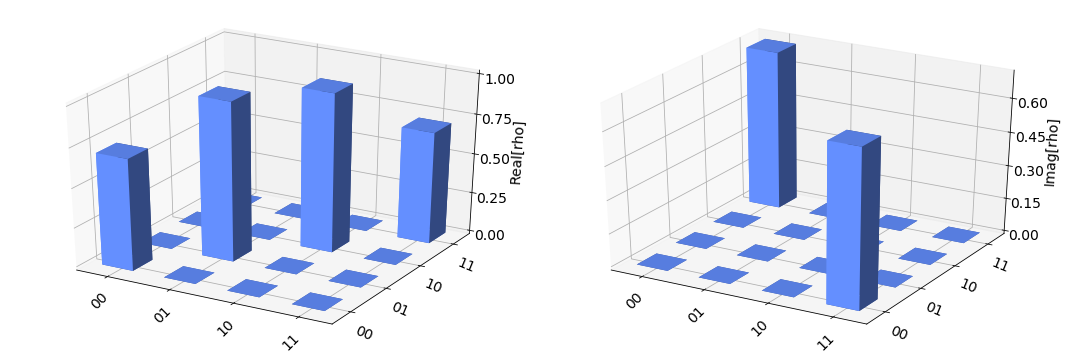

In [490]:
from qiskit.tools.visualization import plot_state_city
plot_state_city(outputstate)